In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Python\Python course\data_jobs.csv')
dfvg = pd.read_csv(r'D:\Python\Alex\Files\vgsales.csv')

new_columns = ['job', 'fname', 'location', 'via', 'schedule', 'remote','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])                                                                # converting the column from string format to date time format
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)                       # converts job_skills from sting to list
#df.dropna(subset=['salyr'],inplace=True)

##### prob 3

###### <pre> top 10 skills for data analyst, data engineers etc

###### solution

In [3]:
df_3 = df.copy()

top_skills = 15
role = 'Data Engineer'

df_3 = df_3[df_3['job']== role].explode('skills')
skill_list = df_3['skills'].value_counts().head(top_skills).index.to_list()
df_3 = df_3.pivot_table(index='skills', columns='job',aggfunc='size')
df_3 = df_3.loc[skill_list]
df_3

job,Data Engineer
skills,
sql,113130
python,108022
aws,62049
azure,60674
spark,53656
java,35559
kafka,29073
hadoop,28815
scala,28716


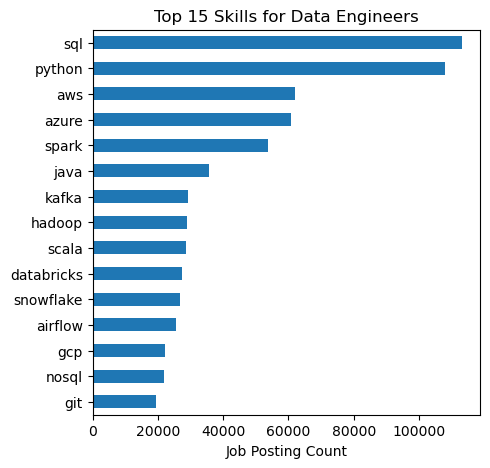

In [4]:
df_3.plot(kind='barh',figsize=(5,5)) 
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {top_skills} Skills for {role}s')
plt.gca().invert_yaxis()                                                                                         # inverting Y axis, you can also di that be df_3[::-1].plot(kind='barh',figsize=(5,5))
plt.legend().set_visible(False)
plt.show()